In [24]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [25]:
all_df = pd.read_excel("data/titanic3.xls")

In [26]:
cols=['survived','name','pclass' ,'sex', 'age',
       'fare',]
all_df=all_df[cols]

In [27]:
df=all_df.drop(['name'], axis=1)
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)
df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)

In [28]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [29]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

In [30]:
train_Features[355:359]

array([[0.5       , 0.        , 0.32049799, 0.12687155],
       [0.5       , 0.        , 0.64665896, 0.12687155],
       [0.5       , 0.        , 0.74178924, 0.03122992],
       [0.5       , 1.        , 0.32049799, 0.14346245]])

In [31]:
train_Label[:4]

array([1., 1., 0., 0.])

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Dense(units=40, input_dim=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [35]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [36]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [37]:
model.add(Dense(units=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [38]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                200       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 2,271
Trainable params: 2,271
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [41]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 0s - loss: 0.6924 - acc: 0.5613 - val_loss: 0.6874 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6904 - acc: 0.5871 - val_loss: 0.6805 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6854 - acc: 0.5871 - val_loss: 0.6539 - val_acc: 0.7885
Epoch 4/30
 - 0s - loss: 0.6412 - acc: 0.5871 - val_loss: 0.4997 - val_acc: 0.7885
Epoch 5/30
 - 0s - loss: 0.5752 - acc: 0.6892 - val_loss: 0.4507 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.5612 - acc: 0.7720 - val_loss: 0.4567 - val_acc: 0.7885
Epoch 7/30
 - 0s - loss: 0.5390 - acc: 0.7731 - val_loss: 0.4480 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.5232 - acc: 0.7731 - val_loss: 0.4586 - val_acc: 0.7885
Epoch 9/30
 - 0s - loss: 0.5119 - acc: 0.7731 - val_loss: 0.4436 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.4935 - acc: 0.7731 - val_loss: 0.4484 - val_acc: 0.7885
Epoch 11/30
 - 0s - loss: 0.4798 - acc: 0.7699 - val_loss: 0.4458 - val_acc: 0.7885
Epoch 12/30
 - 0s - loss: 0.4756 - acc:

In [42]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

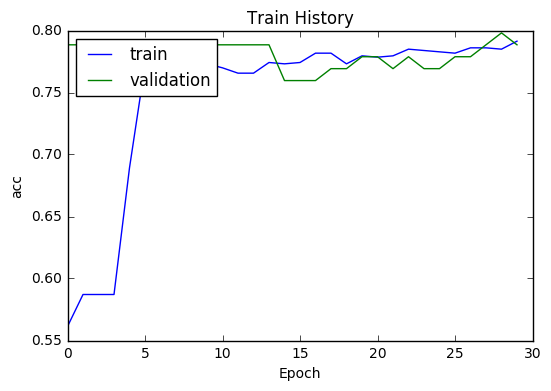

In [43]:
show_train_history(train_history,'acc','val_acc')

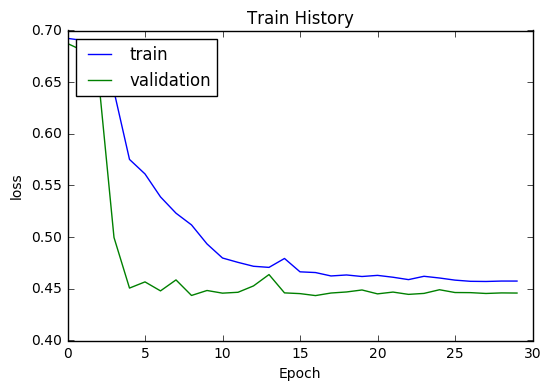

In [44]:
show_train_history(train_history,'loss','val_loss')

In [45]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 200us/step


In [46]:
scores[1]

0.7818181822516701